<a href="https://colab.research.google.com/github/d823944/ML100-Days/blob/master/Homework/Day077_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

Using TensorFlow backend.


170500096/170498071 [==============================] - 844s 5us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [0]:
def plot_loss_acc(history_dict, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']

    epochs = range(1, len(loss_values) + 1)

    ax1.plot(epochs, loss_values, 'k:', label='training loss')
    ax1.plot(epochs, val_loss_values, 'b--', label='validation loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.set_title(title)

    ax2.plot(epochs, acc_values, 'k:', label='training accuracy')
    ax2.plot(epochs, val_acc_values, 'b--', label='validation accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.set_title(title)
    plt.tight_layout()
    plt.show()

In [3]:
X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
print(Y_train.shape, Y_test.shape)

(50000, 3072) (10000, 3072)
(50000, 10) (10000, 10)


In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense

def build_model():
    """
    Try to build your own model
    """
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model
    

In [6]:
optimizer = keras.optimizers.Adam(lr=0.001)
epochs = 500

model = build_model()

model.compile(optimizer=optimizer,
             loss='categorical_crossentropy',
             metrics=['accuracy'])


print(model.summary())

history = model.fit(X_train, Y_train, 
                  epochs=epochs, 
                  batch_size=256, 
                  validation_data=(X_test, Y_test), 
                  verbose=2)

#plot_loss_acc(history.history, title=f"Epochs = {epochs}")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
None
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
 - 3s - loss: 1.9315 - acc: 0.2988 - val_loss: 1.7591 - val_acc: 0.3753
Epoch 2/500
 - 3s - loss: 1.7008 - acc: 0.3949 - val_loss: 1.6509 - val_acc: 0.4154
Epoch 3/500
 - 3s - loss: 1.6106 - acc: 0

NameError: ignored

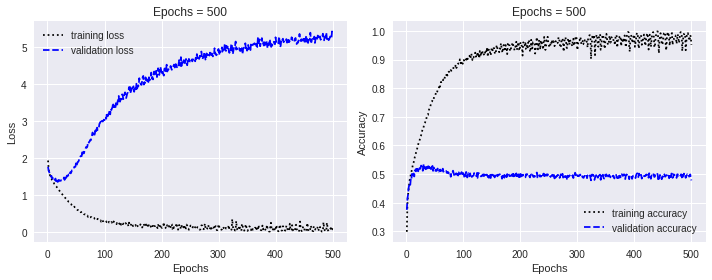

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plot_loss_acc(history.history, title=f"Epochs = {epochs}")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
None
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 3s - loss: 2.0554 - acc: 0.2716 - val_loss: 1.9319 - val_acc: 0.3056
Epoch 2/100
 - 2s - loss: 1.8726 - acc: 0.3396 - val_loss: 1.8309 - val_acc: 0.3535
Epoch 3/100
 - 2s - loss: 1.8085 - acc: 0

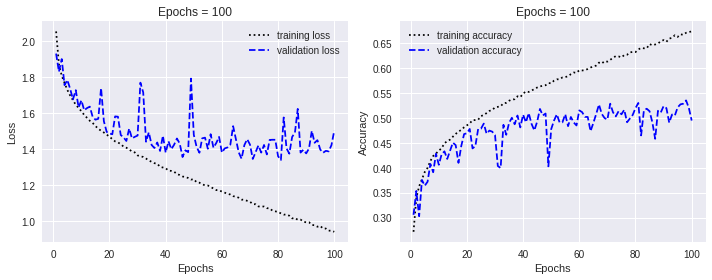

In [8]:
optimizer = 'sgd'
epochs = 100

model = build_model()

model.compile(optimizer=optimizer,
             loss='categorical_crossentropy',
             metrics=['accuracy'])


print(model.summary())

history = model.fit(X_train, Y_train, 
                  epochs=epochs, 
                  batch_size=256, 
                  validation_data=(X_test, Y_test), 
                  verbose=2)

plot_loss_acc(history.history, title=f"Epochs = {epochs}")